In [22]:
import pandas as pd
import openpyxl
import networkx as nx
import matplotlib.pyplot as plt
import os

In [10]:
df_distance_km = pd.read_excel('../dataset/df_distance_km.xlsx')
df_distance_km

,Cliente_1,Cliente_2,Cliente_3,Cliente_4,Cliente_5,Cliente_6,Cliente_7,Cliente_8,Cliente_9,Cliente_10,...,Cliente_12,Cliente_13,Cliente_14,Cliente_15,Cliente_16,Cliente_17,Cliente_18,Cliente_19,Cliente_20,Almacén
0,0.0000,7.5625,15.5365,1.1998,4.7145,1.7407,7.9408,17.1947,4.2933,3.2659,...,6.0225,5.4470,2.2133,11.1505,1.5775,10.8288,9.1456,20.4871,22.1445,3.6114
1,7.5625,0.0000,3.3838,7.7433,14.5720,8.5237,0.4847,13.7974,10.1522,7.1521,...,10.1049,2.6961,13.4907,18.0835,7.0275,19.8218,8.2737,9.6369,19.1038,10.7361
2,15.5365,3.3838,0.0000,12.5438,0.0000,0.0000,0.0000,16.0355,13.9120,13.0649,...,12.3430,5.0114,15.7289,17.9217,9.6824,22.0599,10.5118,7.7574,16.5997,13.9021
3,1.1998,7.7433,12.5438,0.0000,5.0721,0.9119,7.5798,17.4095,3.5781,3.3451,...,6.2330,4.7117,2.8799,11.3610,1.3127,11.1926,9.3561,20.7019,21.1518,3.3673
4,4.7145,14.5720,0.0000,5.0721,0.0000,4.8187,0.0000,0.0000,0.0000,7.2170,...,6.8738,9.1064,3.6476,12.0019,5.4347,5.2872,9.9969,21.3384,25.5947,4.5417
5,1.7407,8.5237,0.0000,0.9119,4.8187,0.0000,7.8866,20.0472,2.9060,4.0899,...,8.8750,5.0185,3.2185,14.0030,2.0575,11.4008,11.9981,19.7467,20.4797,2.6952
6,7.9408,0.4847,0.0000,7.5798,0.0000,7.8866,0.0000,13.9893,10.1499,7.3440,...,10.2968,0.0000,0.0000,0.0000,7.2194,20.0138,8.4656,9.8289,17.1722,10.9280
7,17.1947,13.7974,16.0355,17.4095,0.0000,20.0472,13.9893,0.0000,19.6963,12.9161,...,12.3127,13.5906,14.8623,5.9742,14.6038,22.6587,8.9984,15.5515,34.1368,20.8703
8,4.2933,10.1522,13.9120,3.5781,0.0000,2.9060,10.1499,19.6963,0.0000,6.8679,...,10.1024,7.7229,4.5536,15.2304,4.8355,9.7565,13.2255,24.5670,22.9781,1.0494
9,3.2659,7.1521,13.0649,3.3451,7.2170,4.0899,7.3440,12.9161,6.8679,0.0000,...,2.3061,4.9896,0.0000,8.2196,0.0000,10.8948,5.3050,17.5604,21.1407,5.9516


In [11]:
df_distance_min = pd.read_excel('../dataset/df_distance_min.xlsx')
df_distance_min

,Cliente_1,Cliente_2,Cliente_3,Cliente_4,Cliente_5,Cliente_6,Cliente_7,Cliente_8,Cliente_9,Cliente_10,...,Cliente_12,Cliente_13,Cliente_14,Cliente_15,Cliente_16,Cliente_17,Cliente_18,Cliente_19,Cliente_20,Almacén
0,0.000000,15.731667,19.651667,2.543333,7.550000,3.760000,15.838333,22.388333,8.563333,7.185000,...,10.028333,12.336667,5.098333,17.525000,2.943333,15.548333,15.105000,23.855000,23.700000,6.905000
1,15.731667,0.000000,7.505000,15.798333,17.241667,17.316667,1.248333,20.700000,21.325000,13.503333,...,14.423333,6.695000,15.891667,20.061667,14.023333,26.153333,14.803333,14.235000,21.908333,20.381667
2,19.651667,7.505000,0.000000,19.285000,0.000000,0.000000,0.000000,22.076667,19.981667,17.378333,...,15.800000,11.541667,17.270000,20.405000,18.500000,27.531667,16.181667,13.023333,18.080000,20.873333
3,2.543333,15.798333,19.285000,0.000000,8.533333,1.878333,16.521667,22.863333,7.165000,7.013333,...,10.501667,10.768333,6.181667,18.000000,2.465000,16.546667,15.580000,24.328333,23.030000,7.400000
4,7.550000,17.241667,0.000000,8.533333,0.000000,9.711667,0.000000,0.000000,0.000000,11.058333,...,8.793333,18.555000,7.391667,16.291667,10.738333,9.998333,13.871667,22.620000,28.093333,7.938333
5,3.760000,17.316667,0.000000,1.878333,9.711667,0.000000,17.068333,22.668333,6.033333,8.281667,...,10.308333,11.315000,7.038333,17.806667,3.733333,16.240000,15.386667,23.876667,21.898333,6.268333
6,15.838333,1.248333,0.000000,16.521667,0.000000,17.068333,0.000000,20.826667,20.988333,13.631667,...,14.550000,0.000000,0.000000,0.000000,14.150000,26.281667,14.931667,14.363333,21.193333,20.510000
7,22.388333,20.700000,22.076667,22.863333,0.000000,22.668333,20.826667,0.000000,25.133333,16.505000,...,15.503333,20.850000,18.231667,10.558333,18.380000,22.963333,15.533333,20.250000,30.101667,23.618333
8,8.563333,21.325000,19.981667,7.165000,0.000000,6.033333,20.988333,25.133333,0.000000,13.976667,...,12.048333,15.173333,9.086667,19.546667,9.428333,13.025000,17.126667,25.875000,25.266667,1.841667
9,7.185000,13.503333,17.378333,7.013333,11.058333,8.281667,13.631667,16.505000,13.976667,0.000000,...,5.411667,10.275000,0.000000,13.880000,0.000000,18.623333,10.886667,20.208333,26.283333,11.388333


In [12]:
df_historic_order_demand = pd.read_excel('../dataset/df_historic_order_demand.xlsx')
df_historic_order_demand

,cliente,mes_anio,order_demand
0,Cliente_1,12-2020,857.0
1,Cliente_2,12-2020,941.0
2,Cliente_3,12-2020,878.0
3,Cliente_4,12-2020,949.0
4,Cliente_5,12-2020,932.0
...,...,...,...
975,Cliente_16,12-2024,891.0
976,Cliente_17,12-2024,968.0
977,Cliente_18,12-2024,972.0
978,Cliente_19,12-2024,901.0


In [13]:
df_location = pd.read_excel('../dataset/df_location.xlsx')
df_location

,Cliente,Latitud,Longitud
0,Cliente_1,40.402828,-3.696878
1,Cliente_2,40.455820,-3.700350
2,Cliente_3,40.471840,-3.708079
3,Cliente_4,40.404688,-3.706262
4,Cliente_5,40.371990,-3.695056
5,Cliente_6,40.400481,-3.712361
6,Cliente_7,40.457059,-3.703511
7,Cliente_8,40.446872,-3.586515
8,Cliente_9,40.389637,-3.735354
9,Cliente_10,40.409083,-3.676125


In [14]:
df_orders = pd.read_excel('../dataset/df_orders.xlsx')
df_orders

,cliente,mes_anio,order_demand
0,Cliente_1,12-2024,909
1,Cliente_2,12-2024,959
2,Cliente_3,12-2024,960
3,Cliente_4,12-2024,980
4,Cliente_5,12-2024,979
5,Cliente_6,12-2024,908
6,Cliente_7,12-2024,924
7,Cliente_8,12-2024,920
8,Cliente_9,12-2024,886
9,Cliente_10,12-2024,964


In [16]:
df_vehicle = pd.read_excel('../dataset/df_vehicle.xlsx')
df_vehicle

,vehiculo_id,capacidad_kg,costo_km,autonomia_km
0,1,2026,0.20,603
1,2,4362,0.14,630
2,3,4881,0.20,664
3,4,3321,0.19,514
4,5,10000,0.32,350
5,6,3129,0.14,791


# MODELO DE E-R

Archivo cargado: df_vehicle.xlsx
Archivo cargado: df_orders.xlsx
Archivo cargado: df_location.xlsx
Archivo cargado: df_distance_min.xlsx
Archivo cargado: df_distance_km.xlsx
Archivo cargado: df_historic_order_demand.xlsx


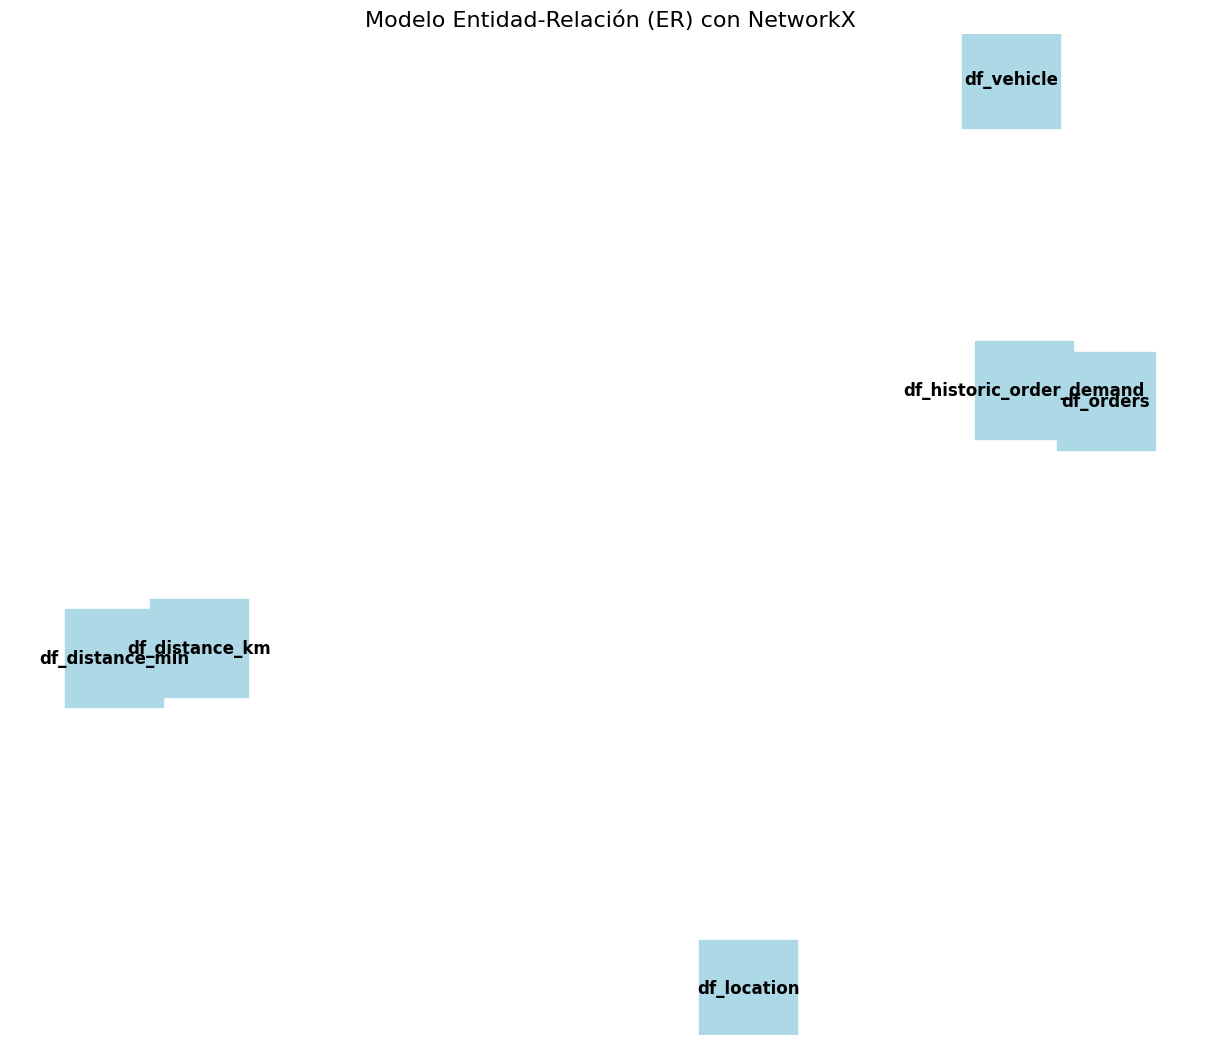

In [ ]:
import pandas as pd
import os
import networkx as nx
import matplotlib.pyplot as plt

# Ruta donde están tus archivos Excel
folder_path = '../dataset/'  # Ruta relativa desde src

# Lista de nombres de los archivos Excel
file_names = [
    'df_vehicle.xlsx',
    'df_orders.xlsx',
    'df_location.xlsx',
    'df_distance_min.xlsx',
    'df_distance_km.xlsx',
    'df_historic_order_demand.xlsx'
]

# Cargar cada archivo Excel en un diccionario
dataframes = {}
for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)  # Forma la ruta completa
    if os.path.exists(file_path):  # Verifica que el archivo existe antes de intentar cargarlo
        key = file_name.replace('.xlsx', '')  # El nombre del DataFrame será el nombre del archivo sin extensión
        dataframes[key] = pd.read_excel(file_path)
        print(f"Archivo cargado: {file_name}")
    else:
        print(f"Archivo no encontrado: {file_path}")

# Crear un grafo no dirigido para el modelo ER
G = nx.Graph()

# Agregar las tablas como nodos al grafo
for name in dataframes:
    G.add_node(name, label=name)

# Buscar relaciones (columnas comunes entre tablas)
relations = []

for name1, df1 in dataframes.items():
    for name2, df2 in dataframes.items():
        if name1 != name2:  # No comparar una tabla consigo misma
            # Encuentra las columnas comunes entre name1 y name2
            common_columns = set(df1.columns) & set(df2.columns)
            for column in common_columns:
                if common_columns:  # Si existen columnas comunes
                    # Añadir una relación con la columna común como atributo
                    relations.append((name1, name2, column))

# Añadir las relaciones al grafo (aristas entre las tablas)
for table1, table2, column in relations:
    G.add_edge(table1, table2, label=column)

# Visualización del grafo (mejorado para simular un diagrama ER)
plt.figure(figsize=(12, 10))

# Disposición de los nodos en una cuadrícula organizada (layout más estructurado)
pos = nx.spring_layout(G, seed=42, k=0.2)  # Ajuste en 'k' para más espacio entre nodos

# Dibuja los nodos (tablas) con forma rectangular
nx.draw(G, pos, with_labels=True, node_size=5000, node_color='lightblue', font_size=12, font_weight='bold', edge_color='gray', width=1.5, node_shape='s')

# Dibuja las etiquetas de las relaciones (columnas comunes)
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

# Título y mostrar el gráfico
plt.title("Modelo Entidad-Relación (ER) con NetworkX", fontsize=16)
plt.axis('off')  # Desactivar los ejes para una mejor visualización
plt.show()
